In [88]:
import random as rd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error #, r2_score
from sklearn.model_selection import train_test_split

import gspread
from sqlalchemy import create_engine
import re

gc = gspread.service_account(filename="./credentials.json")

import environ
env = environ.Env()
database_url = env.str(
    var="DATABASE_URL", default="postgres://postgres:@postgres:5432/postgres"
)
engine = create_engine(database_url, echo=False)

In [2]:
data = pd.read_sql("marketing_lead", engine)

In [53]:
data

,id,created_at,updated_at,source,compaign_name,ads_set_name,ads_id,name,company_name,phone,...,pipedrive_enable,pipedrive_is_send,day_of_week,date,time,details,value,week,month,year
2,509,2021-02-20 19:24:01.275253+00:00,2021-02-22 15:24:22.812849+00:00,GG ORG,,,,ชุติพนธ์,ชุติพนธ์,0916982333,...,True,True,6,2021-02-21,02:24:00,None,0,7,2,2021
5,173,2021-01-20 10:28:13.998254+00:00,2021-02-22 15:24:22.878822+00:00,GG ADS,,,,narunart,qcon,35259131,...,False,False,3,2020-12-24,09:15:00,,0,52,12,2020
9,198,2021-01-20 10:28:14.522182+00:00,2021-02-22 15:24:22.905731+00:00,FB ADS,PRO:EMEM_OBJ:CONV_AW:SING_CONT:4STEPS_,BISS-JOBSTITLE-TECH-060121,23846644567020634,Chaowalit Yongkunsiri,บจก. บีเอสแอล โกลบอล,925262591,...,False,False,6,2021-01-10,12:42:00,,0,1,1,2021
10,512,2021-02-22 09:51:36.106114+00:00,2021-02-22 15:24:22.815781+00:00,FB ADS,,,,ฉลองรัฐ,East Water,,...,True,True,0,2021-02-22,16:50:11,None,0,8,2,2021
16,234,2021-01-20 10:28:15.357089+00:00,2021-02-22 15:24:22.844946+00:00,MANUAL,,,,duangjai sittikan,เอสพีเค ซาวด์ ซิสเต็มส์,884967295,...,False,False,0,2021-01-18,10:33:00,,0,3,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,166,2021-01-20 10:28:13.855893+00:00,2021-02-22 15:24:23.404851+00:00,FB ADS,,,,,eternal enterprise,,...,False,False,4,2020-12-11,00:00:00,,0,50,12,2020
294,175,2021-01-20 10:28:14.028153+00:00,2021-02-22 15:24:23.406762+00:00,GG ORG,,,,นงนภัส ปานสมบัติ,บริษัท เอ็มโอแค็ป จำกัด,22039014,...,False,False,0,2020-12-28,14:19:00,,0,53,12,2020
295,401,2021-02-04 00:27:25.390476+00:00,2021-02-22 15:24:23.409146+00:00,FB ADS,PRO:EMEM_OBJ:CONV_CN:NORM_AW:SING_CONT:SING,BISS-JOBSTITLE-TECH-270121,23846847881240634,Kitichai,Boncafe (Thailand) Ltd.,061-636-5944,...,True,True,3,2021-02-04,07:27:25,None,0,5,2,2021
296,190,2021-01-20 10:28:14.356196+00:00,2021-02-22 15:24:23.411073+00:00,FB POST,,,,Tarit Nakavajara,24 FIX,855667715,...,False,False,4,2021-01-08,11:46:00,,0,1,1,2021


In [4]:
data.describe()

,id,day_of_week,value
count,298.000000,298.000000,298.0
mean,329.335570,2.506711,0.0
std,134.297203,1.747038,0.0
min,130.000000,0.000000,0.0
25%,204.250000,1.000000,0.0
50%,326.500000,2.000000,0.0
75%,451.750000,4.000000,0.0
max,563.000000,6.000000,0.0


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 2 to 297
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   id                 198 non-null    int64              
 1   created_at         198 non-null    datetime64[ns, UTC]
 2   updated_at         198 non-null    datetime64[ns, UTC]
 3   source             198 non-null    object             
 4   compaign_name      198 non-null    object             
 5   ads_set_name       198 non-null    object             
 6   ads_id             198 non-null    object             
 7   name               198 non-null    object             
 8   company_name       198 non-null    object             
 9   phone              198 non-null    object             
 10  email              170 non-null    object             
 11  industry           198 non-null    object             
 12  status             198 non-null    object         

In [92]:
data.shape

(198, 30)

In [5]:
data.dtypes

id                                 int64
created_at           datetime64[ns, UTC]
updated_at           datetime64[ns, UTC]
source                            object
compaign_name                     object
ads_set_name                      object
ads_id                            object
name                              object
company_name                      object
phone                             object
email                             object
industry                          object
status                            object
reason                            object
from_url                          object
remark                            object
product                           object
datetime             datetime64[ns, UTC]
company_size                      object
lead_name                         object
pipedrive_enable                    bool
pipedrive_is_send                   bool
day_of_week                        int64
date                      datetime64[ns]
time            

In [6]:
data['week'] = data['date'].dt.isocalendar().week
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

In [7]:
data = data[data['status'] == 'WIN']
feature = ['status', 'week','month', 'year']
cl_data = data[feature]
by_data = cl_data.groupby(['year','month', 'week']).agg(['count'])

In [8]:
re_data = by_data.reset_index()
re_data = re_data[re_data['week'] > 2]
re_data['index_week'] = [i + 1 for i in range(len(re_data[['week']]))]
re_data.set_index(['year', 'month'])

week status index_week
                 count           
year month                       
2020 10      42      1          1
     11      44      2          2
     11      45      7          3
     11      46      1          4
     11      47      4          5
     11      48      4          6
     11      49      1          7
     12      49      3          8
     12      50      2          9
     12      51      5         10
     12      52      1         11
     12      53      1         12
2021 1        3     19         13
     1        4     21         14
     2        5     16         15
     2        6     14         16
     2        7     17         17
     2        8     10         18
     3        9      6         19

<AxesSubplot:xlabel='index_week'>

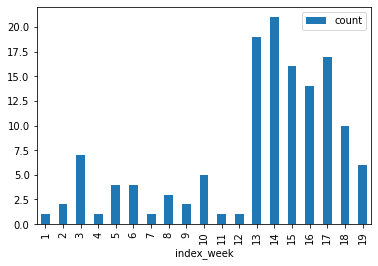

In [9]:

re_data.plot(kind='bar', x='index_week', y='status')

In [10]:
data_x = re_data[['index_week']]
data_y = re_data.status

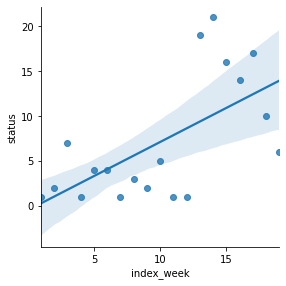

In [11]:
sns.pairplot(re_data, x_vars='index_week', y_vars='status', height=4,kind='reg')

plt.show()

In [12]:
lr = LinearRegression().fit(data_x, data_y)
sc = lr.score(data_x, data_y)
sc

0.3897773363132191

In [13]:
lr.coef_ , lr.intercept_  # m and b

(array([[0.76140351]]), array([-0.50877193]))

In [14]:
pre_data = lr.predict([[20],[21]])
pre_data

array([[14.71929825],
       [15.48070175]])

In [93]:
spent_fb = pd.read_sql("etl_marketing_facebook", engine)
spent_fb

,ad_id,ad_name,adset_name,campaign_id,campaign_name,clicks,cpc,cpm,cpp,ctr,...,spend,unique_clicks,campaign_objective,status,type,landing_page_view,product,objective,Campaign name,artwork
0,23845924248770634,"Post: ""เคยเจอปัญหาต้องเข้าออฟฟิศ เพื่อเซ็นเอกส...","Post: ""เคยเจอปัญหาต้องเข้าออฟฟิศ เพื่อเซ็นเอกส...",23845924248710634,PRO:EMEM_OBJ:ENGA_CN:NORM_AW:MULT_CONT:BOARD,65,1.588462,176.797945,202.848723,11.130137,...,103.25,65,POST_ENGAGEMENT,PAUSED,daily,None,EMEM,ENGA,NORM,MULT
1,23845924248770634,"Post: ""เคยเจอปัญหาต้องเข้าออฟฟิศ เพื่อเซ็นเอกส...","Post: ""เคยเจอปัญหาต้องเข้าออฟฟิศ เพื่อเซ็นเอกส...",23845924248710634,PRO:EMEM_OBJ:ENGA_CN:NORM_AW:MULT_CONT:BOARD,74,2.211486,168.01848,233.452211,7.597536,...,163.65,72,POST_ENGAGEMENT,PAUSED,daily,None,EMEM,ENGA,NORM,MULT
2,23845924248770634,"Post: ""เคยเจอปัญหาต้องเข้าออฟฟิศ เพื่อเซ็นเอกส...","Post: ""เคยเจอปัญหาต้องเข้าออฟฟิศ เพื่อเซ็นเอกส...",23845924248710634,PRO:EMEM_OBJ:ENGA_CN:NORM_AW:MULT_CONT:BOARD,79,2.166329,135.610143,196.93901,6.259905,...,171.14,78,POST_ENGAGEMENT,PAUSED,daily,None,EMEM,ENGA,NORM,MULT
3,23845924248770634,"Post: ""เคยเจอปัญหาต้องเข้าออฟฟิศ เพื่อเซ็นเอกส...","Post: ""เคยเจอปัญหาต้องเข้าออฟฟิศ เพื่อเซ็นเอกส...",23845924248710634,PRO:EMEM_OBJ:ENGA_CN:NORM_AW:MULT_CONT:BOARD,21,2.950476,152.610837,179.594203,5.172414,...,61.96,21,POST_ENGAGEMENT,PAUSED,daily,None,EMEM,ENGA,NORM,MULT
4,23845970223610634,Video-071020,Biz-071020,23845806592580634,PRO:EMEM_OBJ:LEAD_CN:NORM_AW:SING_CONT:MIX,15,4.051333,394.61039,407.852349,9.74026,...,60.77,14,LEAD_GENERATION,PAUSED,daily,None,EMEM,LEAD,NORM,SING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,23847040714150634,AW:SING_CONT:4STEPS_,BISS-JOBSTITLE-TECH-220221,23846644567000634,PRO:EMEM_OBJ:CONV_CN:NORM_AW:SING_CONT:4STEPS,187,2.586952,54.588129,59.139364,2.110133,...,483.76,168,CONVERSIONS,ACTIVE,daily,74,EMEM,CONV,NORM,SING
431,23847084872460634,AW:SING_CONT:4STEPS_,LOOKALIKE-WEBSITE-VISITORS-010321,23846644567000634,PRO:EMEM_OBJ:CONV_CN:NORM_AW:SING_CONT:4STEPS,46,7.050217,110.197078,120.516537,1.563031,...,324.31,38,CONVERSIONS,ACTIVE,daily,19,EMEM,CONV,NORM,SING
432,23847084922800634,AW:VIDEO_CONT:FEATURES,BISS&IT-TECH-010321,23847084922780634,PRO:EMEM_OBJ:VIDEO_CN:NORM_AW:VIDEO_CONT:FEATURES,13,22.933846,74.497751,74.853126,0.324838,...,298.14,13,VIDEO_VIEWS,ACTIVE,daily,7,EMEM,VIDEO,NORM,VIDEO
433,23847087335260634,AW:SING_CONT:BOSS-VS-STAFF,BISS-JOBSTITLE-TECH-010321,23847087335160634,PRO:EMEM_OBJ:ENGA_CN:EVENT-RESPONSE_AW:SING_CO...,118,0.840593,90.501825,97.627953,10.766423,...,99.19,110,POST_ENGAGEMENT,ACTIVE,daily,1,EMEM,ENGA,EVENT-RESPONSE,SING


In [94]:
spent_fb.shape

(435, 26)

In [16]:
print(spent_fb.shape)
spent_fb = spent_fb[spent_fb['type'] == 'daily']
feature_fb = ['clicks', 'impressions', 'spend', 'date_start']
spent_fb = spent_fb[feature_fb]

(435, 26)


In [17]:
spent_fb.dtypes

clicks         object
impressions    object
spend          object
date_start     object
dtype: object

In [18]:
spent_fb['date'] = pd.to_datetime(spent_fb['date_start'])
spent_fb['spend'] = spent_fb['spend'].astype(float)

In [19]:
spent_fb.dtypes

clicks                 object
impressions            object
spend                 float64
date_start             object
date           datetime64[ns]
dtype: object

In [20]:
spent_fb['week'] = spent_fb['date'].dt.isocalendar().week
spent_fb['month'] = spent_fb['date'].dt.month
spent_fb['year'] = spent_fb['date'].dt.year
spent_fb = spent_fb[['spend', 'week', 'month', 'year']]
spent_fb

,spend,week,month,year
0,103.25,40,10,2020
1,163.65,40,10,2020
2,171.14,40,10,2020
3,61.96,41,10,2020
4,60.77,41,10,2020
...,...,...,...,...
430,483.76,9,3,2021
431,324.31,9,3,2021
432,298.14,9,3,2021
433,99.19,9,3,2021


In [21]:
by_fb = spent_fb.groupby(['year','month', 'week']).agg(['sum'])
by_fb

spend
                      sum
year month week          
2020 10    40      438.04
           41      898.49
           42     1950.53
           43      870.93
           44     1131.68
     11    45     1380.95
           46     1501.54
           47     1585.33
           48     1693.97
           49      290.48
     12    49     3678.65
           50     2468.21
           51     2218.27
           52     3927.64
           53      738.27
2021 1     1     10011.01
           2     19335.33
           3      9964.86
           4      8862.79
     2     5     11230.47
           6      8036.41
           7     10575.38
           8     10956.27
     3     9      4227.15

In [64]:
re_fb = by_fb.reset_index()
re_fb = re_fb[re_fb['week'] > 2]
re_fb['index_week'] = [i + 1 for i in range(len(re_fb[['week']]))]
rx = re_fb
re_fb = re_fb[['week', 'spend']]

In [66]:
# re_fb.plot(kind='bar', x='index_week', y='spend')


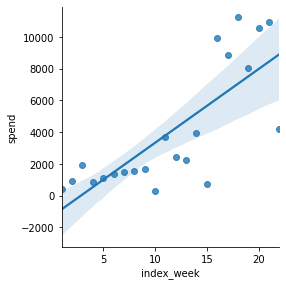

In [67]:
sns.pairplot(rx, x_vars='index_week', y_vars='spend', height=4,kind='reg')

plt.show()

In [25]:
mr_data = re_data.merge(re_fb, on='week', suffixes=('_lead', '_fb'))
mr_data

/usr/local/lib/python3.8/site-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,year,month,week,status,index_week,spend
,,,,count,,sum
0,2020,10,42,1,1,1950.53
1,2020,11,44,2,2,1131.68
2,2020,11,45,7,3,1380.95
3,2020,11,46,1,4,1501.54
4,2020,11,47,4,5,1585.33
5,2020,11,48,4,6,1693.97
6,2020,11,49,1,7,290.48
7,2020,11,49,1,7,3678.65
8,2020,12,49,3,8,290.48


In [95]:
gg_data = pd.read_sql("etl_google_ads", engine)
gg_data.head()

,Date,campaignname,id,adgroupname,criteria,status,clicks,impressions,Cost,ctr,conversions,conversionrate,costperconversion
0,2020-10-27,e-Memo Youtube,297019714445,e-Memo Product Features - 020321,pdf signature online,enabled,0,0,0,0.00%,0,0.00%,0
1,2020-10-28,e-Memo Youtube,297019714445,e-Memo Product Features - 020321,pdf signature online,enabled,0,0,0,0.00%,0,0.00%,0
2,2020-10-29,e-Memo Youtube,297019714445,e-Memo Product Features - 020321,pdf signature online,enabled,0,0,0,0.00%,0,0.00%,0
3,2020-10-30,e-Memo Youtube,297019714445,e-Memo Product Features - 020321,pdf signature online,enabled,0,0,0,0.00%,0,0.00%,0
4,2020-10-31,e-Memo Youtube,297019714445,e-Memo Product Features - 020321,pdf signature online,enabled,0,0,0,0.00%,0,0.00%,0


In [77]:
gg_data.describe()

,Date,campaignname,id,adgroupname,criteria,status,clicks,impressions,Cost,ctr,conversions,conversionrate,costperconversion
count,155008,155008,155008,155008,155008,155008,155008,155008,155008,155008,155008,155008,155008
unique,128,8,398,25,393,3,28,160,923,269,7,15,39
top,2020-11-12,e-Memo,296588230974,Product 250121,e document,enabled,0,0,0,0.00%,0,0.00%,0
freq,1211,131072,1280,29952,1408,144768,153917,151282,153914,153917,154970,154970,154970


In [96]:
gg_data.shape

(155008, 13)

In [78]:
gg_data['Cost'] = gg_data['Cost'].astype(float)
gg_data['clicks'] = gg_data['clicks'].astype(float)
gg_data['impressions'] = gg_data['impressions'].astype(float)
gg_data.eq(0).sum()

Date                      0
campaignname              0
id                        0
adgroupname               0
criteria                  0
status                    0
clicks               153917
impressions          151282
Cost                 153914
ctr                       0
conversions               0
conversionrate            0
costperconversion         0
dtype: int64

In [79]:
gg_data = gg_data.query('Cost != 0 and Cost < 200 and impressions <= 250 and clicks > 0')
gg_data.eq(0).sum()

Date                 0
campaignname         0
id                   0
adgroupname          0
criteria             0
status               0
clicks               0
impressions          0
Cost                 0
ctr                  0
conversions          0
conversionrate       0
costperconversion    0
dtype: int64

In [80]:
gg_data['Date'] = pd.to_datetime(gg_data['Date'])

In [81]:
gg_data['week'] = gg_data['Date'].dt.isocalendar().week
gg_data['month'] = gg_data['Date'].dt.month
gg_data['year'] = gg_data['Date'].dt.year
gg_data = gg_data[['Cost', 'week', 'month', 'year']]
gg_data

,Cost,week,month,year
96,78.46,1,1,2021
97,63.68,1,1,2021
98,6.64,1,1,2021
104,22.91,3,1,2021
274,13.11,2,1,2021
...,...,...,...,...
154947,28.79,9,3,2021
154948,57.54,9,3,2021
155002,25.70,7,2,2021
155006,68.97,9,3,2021


In [84]:
by_gg = gg_data.groupby(['year','month', 'week']).agg(['sum'])
by_gg
re_gg = by_gg.reset_index()
rg = re_gg
re_gg = re_gg[['week', 'Cost']]
re_gg

,week,Cost
,,sum
0,45,680.49
1,46,937.25
2,47,527.09
3,48,851.87
4,49,86.14
5,49,570.11
6,51,524.85
7,52,861.65
8,1,516.92


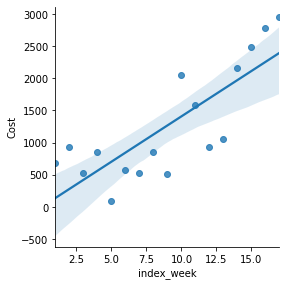

In [85]:
rg['index_week'] = [i + 1 for i in range(len(rg[['week']]))]
sns.pairplot(rg, x_vars='index_week', y_vars='Cost', height=4,kind='reg')

plt.show()

In [33]:
mr_data = mr_data.merge(re_gg, on='week')
mr_data

/usr/local/lib/python3.8/site-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,year,month,week,status,index_week,spend,Cost
,,,,count,,sum,sum
0,2020,11,45,7,3,1380.95,680.49
1,2020,11,46,1,4,1501.54,937.25
2,2020,11,47,4,5,1585.33,527.09
3,2020,11,48,4,6,1693.97,851.87
4,2020,11,49,1,7,290.48,86.14
5,2020,11,49,1,7,290.48,570.11
6,2020,11,49,1,7,3678.65,86.14
7,2020,11,49,1,7,3678.65,570.11
8,2020,12,49,3,8,290.48,86.14


In [39]:
mr_data['sum_cost'] = mr_data.loc[:, ['spend', 'Cost']].sum(axis=1)
rename_data = mr_data.rename(columns={'spend': 'cost_fb', 'Cost':'cost_gg'})
rename_data
data_clear = rename_data[['status', 'cost_fb', 'cost_gg', 'sum_cost']]
data_clear

,status,cost_fb,cost_gg,sum_cost
,count,sum,sum,
0,7,1380.95,680.49,2061.44
1,1,1501.54,937.25,2438.79
2,4,1585.33,527.09,2112.42
3,4,1693.97,851.87,2545.84
4,1,290.48,86.14,376.62
5,1,290.48,570.11,860.59
6,1,3678.65,86.14,3764.79
7,1,3678.65,570.11,4248.76
8,3,290.48,86.14,376.62


<AxesSubplot:xlabel='sum_cost'>

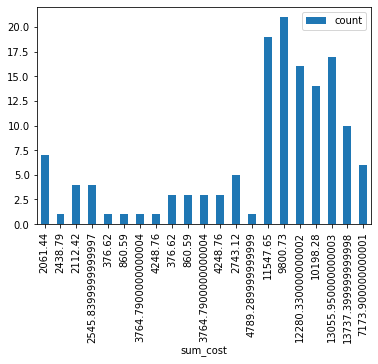

In [40]:
data_clear.plot(kind='bar', x='sum_cost', y='status')

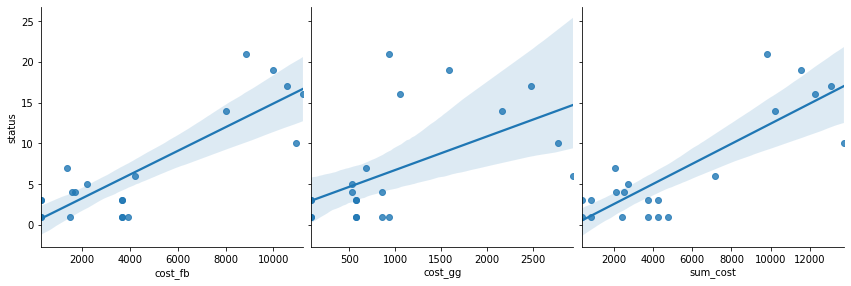

In [43]:
sns.pairplot(data_clear, x_vars=['cost_fb', 'cost_gg', 'sum_cost'], y_vars='status', height=4,kind='reg')

plt.show()

In [86]:
data_x = data_clear[['sum_cost']]
data_y = data_clear.status

In [47]:
lr = LinearRegression().fit(data_x, data_y)
lr.score(data_x, data_y)

0.6994899998356234

In [48]:
lr.coef_ , lr.intercept_  # m and b

(array([[0.00123339]]), array([0.07826804]))

In [51]:
pre_data = lr.predict([[15000],[20000],[30000],[50000]])

In [52]:
pre_data

array([[18.57908546],
       [24.7460246 ],
       [37.07990288],
       [61.74765943]])

In [89]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y)